In [55]:
import meep as mp
import numpy as np
from meep import mpb
import matplotlib.pyplot as plt
#from lattice import *
from sweep_util import *

del_w, del_a, del_hy, del_hx = 0.05, 0.001, 0.025, 0.025
w_max ,a_max = 0.7, 0.45
w_min, a_min, hy_min, hx_min = 0.65, 0.25, 0.1, 0.05

In [62]:
#hx = 0.25, hy = 0.4, a = 0.4, w = 0.7, gamma = 0.14044459663320077
#hx = 0.3, hy = 0.5, a = 0.449, w = 0.7, gamma = 0.1697
#hx = 0.3, hy = 0.425, a = 0.449, w = 0.65, gamma = 0.1644
# hx = 0.275 
# hy = 0.5 
# a = 0.449 
# w = 0.7

number_of_tapered_holes = 10
hx = 0.275 
hy = 0.5
w = 0.7
a_center = 0.385
a_mirror = 0.449
h = 0.19

substrate = True
mode = "yO"

lattice = OneDLattice(Lx = 20, filename = "sub_190_yO.hdf5")
z = lattice.polynomial_elliptical_hole_taper(number_of_tapered_holes = number_of_tapered_holes, 
                                       hx = hx, 
                                       hy = hy, 
                                       w = w, 
                                       a_center = a_center, 
                                       a_mirror = a_mirror)
lattice.apply_poly_spacing()

> <ipython-input-54-26d661c73e6e>(441)polynomial_fit()
    439     a_interest = a_list[ np.where(gamma_arr > 0)][ : len(gamma_interest) ]
    440     breakpoint()
--> 441     p_coeff = np.polyfit(gamma_interest, a_interest, degree)       # degress of freedom for the polynomial
    442 
    443     return p_coeff

ipdb> c


/home/sudhang/mpq/envs/mp/lib/python3.7/site-packages/ipykernel_launcher.py:340: RankWarning: Polyfit may be poorly conditioned


> <ipython-input-54-26d661c73e6e>(347)polynomial_elliptical_hole_taper()
    345         a_arr.sort()
    346         breakpoint()
--> 347         self.poly_spacing = np.append(a_arr, np.zeros(N_mirror))
    348 
    349         for i in range(N_mirror):

ipdb> a_arr
array([0.385     , 0.38570862, 0.38807109, 0.39145669, 0.39410228,
       0.39706146, 0.40286382, 0.41118931, 0.41941066, 0.44633418])
ipdb> gamma_arr
array([0.0314    , 0.04413333, 0.05686667, 0.0696    , 0.08233333,
       0.09506666, 0.1078    , 0.12053333, 0.13326666, 0.146     ])
ipdb> c


In [66]:
lattice.poly_spacing

array([0.385     , 0.38570862, 0.38807109, 0.39145669, 0.39410228,
       0.39706146, 0.40286382, 0.41118931, 0.41941066, 0.44633418,
       0.449     , 0.449     , 0.449     , 0.449     , 0.449     ,
       0.449     , 0.449     , 0.449     , 0.449     , 0.449     ])

In [ ]:
#------------------- check if spacings and coordinates are correct --------------------#
for i in range(19):
    print( lattice.poly_spacing[i+1] - 2 * (lattice.coordinates[i + 1][0] - lattice.coordinates[i][0]) + lattice.poly_spacing[i])


In [ ]:
#------------------ Pow Spacing Set - up ---------------------#
N_taper = 10
hx = 0.143
hy = 0.315
w = 0.65
a_center = 0.314
a_mirror = 0.361
Lx = 20
h = 0.22
lattice = OneDLattice(Lx = Lx)
spacings = lattice.pow_degree_a_taper(N_taper, hx, hy , w , a_center, a_mirror)
lattice.apply_pow_spacing()

In [ ]:
lattice.pow_spacing

In [ ]:
#------------------ Normal Spacing Set - up ---------------------#
lattice = OneDLattice(Lx = 20)
lattice.normal_spacing(0.303, 0.143, 0.315)
lattice.coordinates

In [58]:
#----------- To check lower band edges of mirror segments vs. w_target ----------#

band_upper = []
band_lower = []
target_f = []

a_range = lattice.poly_spacing
#a_range = lattice.pow_spacing
#a_range = np.arange(0.25, 0.275, 0.001)

for a in a_range:
    
    freq = np.array(get_freqs(hx = hx, hy = hy, a = a, w = w, h = h, 
                              mode = mode, substrate = substrate))
    
    freq[0] = convert_freq_to_Thz(freq[0], a)
    freq[1] = convert_freq_to_Thz(freq[1], a)

    freq_target = convert_freq_to_Thz(1/1.54) * 1.01 
    
    band_lower.append(freq[0])
    band_upper.append(freq[1])
    target_f.append(freq_target)
    


 h = 0.19, SUBSTRATE = True, mode = yO
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.82292,0.494792)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.716146,1.30208,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.1237)
          size (1e+20,1e+20,1.7526)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.

Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.75,0.475)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.6875,1.25,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.11875)
          size (1e+20,1e+20,1.7625)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.21853065490722656
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd band 1, yodd ba

Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.55902,0.423163)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.612472,1.11359,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.10579)
          size (1e+20,1e+20,1.78842)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.2217729091644287
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd band

Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.55902,0.423163)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.612472,1.11359,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.10579)
          size (1e+20,1e+20,1.78842)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.24200916290283203
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd ban

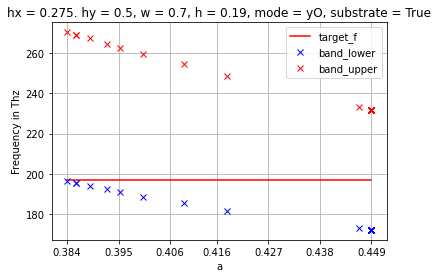

In [59]:
plt.xticks(np.round(np.linspace(a_range[0], a_range[-1], 7), 3))
plt.title("hx = {}. hy = {}, w = {}, h = {}, mode = {}, substrate = {}".format(hx, hy, w, h, mode, substrate))
plt.xlabel("a")
plt.ylabel("Frequency in Thz")
plt.plot(a_range,target_f, 'r', label = "target_f" )
plt.plot(a_range,band_lower, 'bx', label = "band_lower" )
plt.plot(a_range,band_upper, 'rx', label = "band_upper" )
plt.grid()
plt.legend()

 h = 0.19, SUBSTRATE = True, mode = yO
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.81818,0.493506)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.714286,1.2987,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.12338)
          size (1e+20,1e+20,1.75325)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0

Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.73697,0.471464)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.682382,1.24069,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.11787)
          size (1e+20,1e+20,1.76427)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.22517609596252441
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd ban

Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.55902,0.423163)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.612472,1.11359,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.10579)
          size (1e+20,1e+20,1.78842)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.25516629219055176
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd ban

Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.55902,0.423163)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.612472,1.11359,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.10579)
          size (1e+20,1e+20,1.78842)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.2782893180847168
solve_kpoint (0.5,0,0):
yoddfreqs:, k index, k1, k2, k3, kmag/2pi, yodd band

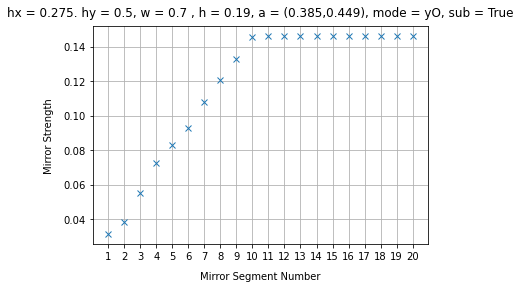

In [65]:
#------- Plot mirror strength for the range a_range -------#

mirror_strength = []

a_range = lattice.poly_spacing
#a_range = lattice.pow_spacing

for a in a_range: 
     freq = get_freqs(hx = hx, hy = hy, a = a, w = w, h = h, 
                      mode = mode, substrate = substrate)
        
     mirror_strength.append(get_gamma(freq, a))

x_range = np.array(range(len(a_range))) + 1

plt.xticks(x_range)
plt.title("hx = {}. hy = {}, w = {} , h = {}, a = ({},{}), mode = {}, sub = {}".format(hx, hy, w, h , a_center, a_mirror, mode, substrate), pad = 10)
plt.xlabel("Mirror Segment Number", labelpad = 10)
plt.ylabel("Mirror Strength", labelpad = 10)
plt.grid()
plt.plot(x_range, mirror_strength, 'x')
#plt.plot( a_range, mirror_strength, 'x')

In [64]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# ---------------------------------------------------------------------#
#  Lattice.py
#
#  Copyright 2018 Andreas Grisch <andreas.gritsch@mpq.mpg.de>
#
# This class represents a 1d waveguide.
# Its most important attribute is (m = Lx, n = Ly) matrix.
# The matrix columns represent (x, y, z, hole_r_x, hole_r_y)

# ---------------------------------------------------------------------#
# LIBRARIES
# ---------------------------------------------------------------------#
import numpy as np
import math
from copy import copy
import h5py
import meep as mp
# ---------------------------------------------------------------------#

del_w, del_a, del_hy, del_hx = 0.05, 0.001, 0.025, 0.025   
w_max ,a_max = 0.7, 0.45
w_min, a_min, hy_min, hx_min = 0.65, 0.25, 0.1, 0.05
class OneDLattice():
    
    
    def __init__(self, Lx, filename = None):
        """
        Creates an numpy array (5,Lx) representing the cavity.
        The first 3 entries are the x,y,z coordinate.
        The last 2 represent hx and hy.
        """
    # -------------------CHANGE CHANGE CHANGE----------------------------------
        
        self.coordinates = np.zeros((Lx, 5))
        self.filename = filename
        self.Lx = Lx
        for i in range(Lx):
            self.coordinates[i, 0] = i
            self.coordinates[i, 3] = 1
            self.coordinates[i, 4] = 1
        if self.filename != None:
            self.data = self.load_data(self.filename)

    def set_y(self, y):
        """
        Set the y value for all holes. Analog to set_z()
        """
        for i in range(self.Lx):
            self.coordinates[i, 1] = y

    def set_z(self, z):
        """
        Set the z value for all holes. Analog to set_y()
        """
        for i in range(self.Lx):
            self.coordinates[i, 2] = z

    def set_hx(self, hx):
        """
        Set hx value for all holes. Analog to set_hy()
        """
        for i in range(self.Lx):
            self.coordinates[i, 3] = hx

    def set_hy(self, hy):
        """
        Set hy value for all holes. Analog to set_hx()
        """
        for i in range(self.Lx):
            self.coordinates[i, 4] = hy
    # -------------------------------

    def modify_xposition(self, i, deltax):
        """
        Modify x coordinate by adding deltax at position i.
        """
        self.coordinates[i, 0] = self.coordinates[i, 0] + deltax
    # -------------------------------

    def modify_hx(self, i, hx_new):
        """
        Set hx to hx_new at position i. Analog to modify_hy()
        """
        self.coordinates[i, 3] = hx_new

    def modify_hy(self,i,hy_new):
        """
        Set hx to hy_new at position i. Analog to modify_hx()
        """
        self.coordinates[i, 4] = hy_new

    def modify_diameter(self, i, diameter_new):
        """
        Set hx and hy to diameter at position i.
        """
        self.coordinates[i, 3] = diameter_new
        self.coordinates[i, 4] = diameter_new
    # -------------------------------

    def remove_hole(self, i):
        """
        Remove a hole by setting its x_coordinate to -1
        """
        self.coordinates[i, 0] = -1
    # -------------------------------

    def output_full(self, lattice_constant=1, hx=1, hy=1):
        """
        Return 'full' x,y,z,hx,hy, meaning the whole np.array plus its mirrored values at x=0
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        output = self.coordinates[idxs, :]*np.array([lattice_constant, lattice_constant, lattice_constant, hx, hy]) + np.array([lattice_constant/2, 0, 0, 0, 0])
        output = np.append((output*np.array([-1, 1, 1, 1, 1]))[::-1, :], output, axis=0)
        return output

    def output_full_negative_axis(self, lattice_constant=1, hx=1, hy=1):
        """
        Return 'full' x,y,z,hx,hy, only on positive x_axis
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        output = self.coordinates[idxs, :]*np.array([lattice_constant, lattice_constant, lattice_constant, hx, hy]) + np.array([lattice_constant/2, 0, 0, 0, 0])
        output = output*np.array([-1, 1, 1, 1, 1])
        return output

    def output_full_positive_axis(self, lattice_constant=1, hx=1, hy=1):
        """
        Return 'full' x,y,z,hx,hy, only on negative x_axis
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        output = self.coordinates[idxs, :]*np.array([lattice_constant, lattice_constant, lattice_constant, hx, hy]) + np.array([lattice_constant/2, 0, 0, 0, 0])
        return output

    def output_coordinates_positive_axis(self, lattice_constant=1):
        """
        Return x,y,z, only on positive x_axis, analog to output_coordinates_negative_axis()
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        output = self.coordinates[idxs, 0:3]*lattice_constant + np.array([lattice_constant/2, 0, 0])
        return output

    def output_coordinates_negative_axis(self, lattice_constant=1):
        """
        Return x,y,z, only on negative x_axis, analog to output_coordinates_positive_axis()
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        output = self.coordinates[idxs, 0:3]*lattice_constant + np.array([lattice_constant/2, 0, 0])
        output = output*np.array([-1, 1, 1])
        return output

    def output_coordinates_full(self, lattice_constant=1):
        """
        Return x,y,z, on both axis.
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        self.output = self.coordinates[idxs, 0:3]*lattice_constant + np.array([lattice_constant/2, 0, 0])
        self.output = np.append((self.output*[-1, 1, 1])[::-1], self.output, axis=0)
        return self.output

    def output_holes_diameters_positive_axis(self, hx=1, hy=1):
        """
        Return hx,hy, on positive axis.
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        self.holes = self.coordinates[idxs,3:4]*[hx,hy]
        return self.holes

    def output_holes_diameters_negative_axis(self, hx=1, hy=1):
        """
        Return hx,hy, on negative axis.
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        self.holes = self.coordinates[idxs,3:4]*[hx,hy]
        return self.holes

    def output_holes_diameters_full(self, hx=1, hy=1):
        """
        Return hx,hy, on both sides.
        """
        idxs = np.any(self.coordinates >= 0, axis=1)
        self.holes = self.coordinates[idxs,3:4]*[hx,hy]
        self.holes = np.append(self.holes,self.holes*[1,1], axis=0)
        return self.holes

    def tapered_spacings(self,a_center,a_lin_center, a_lin_mirror, n_lin ):
        """
        Taper spacing accroding to Loncar from 2008/simpetus tutorial 'experimental'
        """
        self.spacing = np.zeros(self.Lx)
        self.spacing[0] = a_center/2.
        delta_a=(a_lin_mirror-a_lin_center)/(n_lin)
        for i in range(n_lin):
            self.spacing[i+1]=a_lin_center+delta_a*i
        for i in range(self.Lx-n_lin-1):
            self.spacing[i+n_lin+1]=a_lin_mirror
        return self.spacing
    
    def pow_degree_a_taper(self, 
                           N_taper,
                           hx , 
                           hy ,
                           w ,
                           a_center, 
                           a_mirror, 
                           pow = 2):
        '''
        N_taper = Total tapered segments ( including centre and mirror segments)
        pow = degree of tapering monomial 
        '''
        N_taper = N_taper
        self.pow_spacing = []
        
        for i in range(N_taper):
            self.pow_spacing.append(a_center - ((i/(N_taper-1)) ** pow) * (a_center - a_mirror)) 
            
        for i in range(self.Lx - N_taper):
            self.pow_spacing.append(a_mirror)
        
        if (hx != 0 and hy != 0):
            self.set_hx(hx)
            self.set_hy(hy)

        return self.pow_spacing
    
    def apply_pow_spacing(self):        
        
        self.coordinates[0,0] = self.pow_spacing[0] / 2
        for i in range(1, len(self.pow_spacing)):
            self.coordinates[i,0] = sum(self.pow_spacing[:i]) + self.pow_spacing[i]/2  
            
            '''
            |<--------------- line of symmetry
            |______________________
            | o | o | o | o | o |o |
            |______________________
            |   
            ---------> x
                    3rd Hole
                    
            The ith hole has x = a_center/2(=self.polyspacing[0]/2) + self.polyspacing[1] +.... self.poly_spacing[i-1]
            
            '''

    def apply_tapered_spacings(self):
        """
        Apply these :Taper spacing accroding to Loncar from 2008/simpetus tutorial 'experimental'
        """
        self.coordinates[0,0] = self.spacing[0]
        for i in range(1,len(self.spacing-1)):
            self.coordinates[i,0] = self.spacing[i]+self.coordinates[i-1,0]

    def create_background_pattern(self):
        """
        Create background pattern. I dont know why this is here.
        """
        for i in range(self.Lx):
            self.remove_hole(i)

    def lin_hole_taper(self, relative_diameter_at_end):
        """
        Make a linear hole taper. you can specify the relative_diameter_at_end
        """
        delta_radius = (1-relative_diameter_at_end)/self.Lx
        for i in range(self.Lx):
            self.modify_diameter(i,1-delta_radius*i)

    def quadratic_hole_taper(self, relative_diameter_at_end, number_of_tapered_holes=100):
        """
        Make a quadratic hole taper. you can specify the relative_diameter_at_end.
        Specify number_of_tapered_holes if you want to have 'mirror'-holes at the end.
        """
        N = number_of_tapered_holes # use this abbrevation against eye cancer
        if N>self.Lx:
            N=self.Lx
        y_off = (N-1)**2
        for i in range(N):
            self.modify_diameter(i, (y_off-i**2*(1-relative_diameter_at_end))/y_off)
        for i in range(N, self.Lx):
            self.modify_diameter(i, (y_off-N**2*(1-relative_diameter_at_end))/y_off)

    def quartic_elliptical_hole_taper(self, relative_diameter_at_end, number_of_tapered_holes=100):
        """
        Make a quadratic hole taper. you can specify the relative_diameter_at_end.
        Specify number_of_tapered_holes if you want to have 'mirror'-holes at the end.
        """
        N = number_of_tapered_holes  # use this abbrevation against eye cancer
        if N > self.Lx:
            N = self.Lx
        y_off = (N - 1) ** 4
        for i in range(N):
            self.modify_hx(i, 1)
            self.modify_hy(i, (y_off - i ** 4 * (1 - relative_diameter_at_end)) / y_off)
        for i in range(N, self.Lx):
            self.modify_hx(i, 1)
            self.modify_hy(i, (y_off - N ** 4 * (1 - relative_diameter_at_end)) / y_off)
            
    # -------------------CHANGE CHANGE CHANGE----------------------------------#
    
    def polynomial_elliptical_hole_taper(self, number_of_tapered_holes, hx , hy , 
                                         w = 0.7 ,
                                         a_center = 0.390 ,  
                                         a_mirror = 0.449):
                                                              
        '''
        
        a_center(gamma_center) : lattice constant ( gamma ) at the cavity segment
        a_mirror(gamma_mirror) : lattice constant ( gamma ) for non-tapered mirror segment
        data                   : sweep data
        polynomial             : curve thata fits gamma vs a data
        poly_coeff             : degrees of freedom for the polynomial, array = size (degree+1,)
        gamma_arr              : array of N_taper equispaced gammas between (and including) gamma_center and gamma_mirror
        a_arr                  : array of N_taper values of a for each mirror segment
        
        
        '''
        
        
        index_a_center = int((a_center - a_min)/ del_a + 0.1)
        index_a_mirror = int((a_mirror - a_min)/del_a + 0.1)
        index_w = int((w - w_min) / del_w + 0.1)
        index_hy = int((hy - hy_min) / del_hy + 0.1)
        index_hx = int((hx - hx_min) / del_hx + 0.1)
        
        gamma_center = self.data[index_w, index_a_center, index_hy, index_hx]
        gamma_mirror = self.data[index_w, index_a_mirror, index_hy, index_hx]
        
        for i in range(self.Lx):
            self.modify_hx(i, hx)
            self.modify_hy(i, hy)
            
        N_taper = number_of_tapered_holes
        N_mirror = self.Lx - N_taper
        
        data = self.data
        
        gamma_arr = np.linspace(gamma_center, gamma_mirror, N_taper) 
    
        poly_coeff = polynomial_fit(self.data, w , hy, hx , gamma_mirror, degree = 8 )
        polynomial = np.poly1d(poly_coeff)
        
        a_arr = polynomial(gamma_arr)
        a_arr[0] = a_center
        a_arr.sort()
        breakpoint()
        self.poly_spacing = np.append(a_arr, np.zeros(N_mirror))
            
        for i in range(N_mirror):
            self.poly_spacing[N_taper+i] = a_mirror
        
        self.poly_spacing[0] = a_center
        
        return self.poly_spacing
    
    # -------------------CHANGE CHANGE CHANGE----------------------------------#
    
    def apply_poly_spacing(self):        
        
        self.coordinates[0,0] = self.poly_spacing[0] / 2
        for i in range(1, len(self.poly_spacing)):
            self.coordinates[i,0] = sum(self.poly_spacing[:i]) + self.poly_spacing[i]/2  
            
            '''
            |<--------------- line of symmetry
            |______________________
            | o | o | o | o | o |o |
            |______________________
            |   
            ---------> x
                    3rd Hole
                    
            The ith hole has x = a_center/2(=self.polyspacing[0]/2) + self.polyspacing[1] +.... self.poly_spacing[i-1]
            
            '''
    
    def normal_spacing(self, a, hx, hy):
        self.spacing = []
        for i in range(self.Lx):
            self.spacing.append(a)
        self.set_hx(hx)
        self.set_hy(hy)
        self.coordinates[0,0] = self.spacing[0] / 2
        
        for i in range(1, self.Lx):
            self.coordinates[i,0] = sum(self.spacing[:i]) + self.spacing[i]/2 
        
        return self.spacing
        
    def load_data(self, filename = "sweep_data(1).hdf5"):    # CHANGE CHANGE CHANGE
        '''
        Loads data from hdf5 file
        '''
        hf = h5py.File(filename, 'r')
        data = np.array( hf.get("gamma"))
        self.data = data
        hf.close()
        
        x = np.where(data ==-1)
        for i in range(len(x[0])):
            data[x[0][i], x[1][i], x[2][i], x[3][i] ] = 0    # data cleaning 
        
        return data
    
    def get_index(self, w, a, hy, hx):
        
        index_a = int((a - a_min)/del_a + 0.1)
        index_w = int((w - w_min) / del_w + 0.1)
        index_hy = int((hy - hy_min) / del_hy + 0.1)
        index_hx = int((hx - hx_min) / del_hx + 0.1)
        
        return index_w, index_a, index_hy, index_hx
    
 # -------------------CHANGE CHANGE CHANGE---------------------------------- #   
    
def polynomial_fit(data, w, hy, hx, gamma_mirror, degree = 10, a_mirror = 0.347 ):            
        
        
    '''
    NOT a class function 
    
    Fits a polynomial curve of mentioned degree to gamma vs lattice constant(a) data ( for fixed w, hy and hx)
    '''
    


    index_a_mirror = int((a_mirror - a_min)/del_a + 0.1)
    index_w = int((w - w_min) / del_w + 0.1)
    index_hy = int((hy - hy_min) / del_hy + 0.1)
    index_hx = int((hx - hx_min) / del_hx + 0.1)
    
    
    a_list = np.arange(a_min, a_max, del_a)                        # list of a
        
    gamma_arr = data[index_w, :, index_hy, index_hx]               # array of gamma for fixed w, hy and hx
    gamma_NZ = gamma_arr[ gamma_arr > 0]
    
    gamma_interest = gamma_NZ[ : np.where( (gamma_NZ == gamma_mirror))[0][0]]
    a_interest = a_list[ np.where(gamma_arr > 0)][ : len(gamma_interest) ]
    breakpoint()
    p_coeff = np.polyfit(gamma_interest, a_interest, degree)       # degress of freedom for the polynomial
    
    return p_coeff

In [ ]:
#----------------- Load and clean data ---------------------#

hf = h5py.File('sweep_data(1).hdf5', 'r')
data = np.array( hf.get("data"))
data = data
hf.close()



x = np.where(data == - 1)
for i in range(len(x[0])):
    data[x[0][i], x[1][i], x[2][i], x[3][i] ] = 0    # data cleaning 

In [ ]:
plt.xticks(range(10))
plt.plot(range(10),data[0, 100:110 , 8 , 8], 'x')

In [ ]:
a_range = np.linspace(0.34 , 0.4, 20)
mirror_str = []
for a in a_range:
    mirror_str.append(get_gamma(get_freqs(hx = 0.143, hy = 0.315, a = a, wy = 0.65, h = 0.25), a = a))

plt.plot(a_range, mirror_str, 'bx')

In [ ]:
hx = 0.25
hy = 0.45
a = 0.4
w = 0.7

# mirror_str = []
# for a in np.arange(0.4, 0.401, 0.001):
#     mirror_str.append(get_gamma(get_freqs(hx, hy, a , w), a))

get_gamma(get_freqs(hx, hy, a , w), a)

In [ ]:
def a_normal_cavity(geom = None, n_segments=20, waveguide_parameters= None, substrate_parameters=None):    
    
    if geom is None:
        geom = []

    if waveguide_parameters is None:
        waveguide_parameters = {}

    if substrate_parameters is None:
        substrate_parameters = {}

    geom = add_waveguide_1d(geom=geom)

    geom, _ = _a_tapering(geom=geom, n_segments=n_segments)

    # geom = add_substrate(geom=geom, **substrate_parameters)                                                           
    return geom

In [ ]:
def _a_normal_tapering(geom=None, n_segments=20, material_holes=mp.vacuum):
    
    if geom is None:
        geom = []
    material_holes = index_to_material(material_holes)

    _cavity = OneDLattice(Lx = n_segments)
    _cavity.normal_spacing(a = 0.303, hx = 0.143, hy = 0.315)
    
    for x, y, z, hx, hy in _cavity.coordinates:
        # holes are completely filled with tuning material:
        geom.append(mp.Ellipsoid(material=material_holes,
                                         center=mp.Vector3(x, y, z),
                                         size=mp.Vector3(hx, hy, mp.inf)
        geom.append(mp.Ellipsoid(material=material_holes,
                                         center=mp.Vector3(-x, y, z),
                                         size=mp.Vector3(hx, hy, mp.inf)))
                                 
    return geom, length

In [ ]:
import h5py
import numpy as np
# ------------ to find a_cen for resonance from the hdf5 file -----------------#
with h5py.File("sub_190_yO.hdf5") as f:
    gamma = np.array(f.get("gamma"))
    
    freq = np.array(f.get("freq"))
    #freq_lower = np.array(f.get("freq_lower"))
    #freq_upper = np.array(f.get("freq_upper"))
    

In [ ]:
hx = 0.275 
hy = 0.5 
a = 0.449 
w = 0.7
index_w ,index_a, index_hy, index_hx = get_index(w, a, hy, hx)



In [ ]:
param_range = np.arange(0.390, 0.440, 0.002)
for a_i in param_range:
    print(get_freq_Thz(hx = hx, hy = hy, a = a_i, w = w, substrate= True, mode= "zEyO", h = 0.19))

In [ ]:
get_gamma_from_Thz(get_freq_Thz(hx = hx, hy = hy, a = 0.386, w = w, substrate= True, mode= "yO", h = 0.19), 
                   check_freq = 196.75324675324677)

In [ ]:
get_freq_Thz(hx = hx, hy = hy, a = 0.385, w = w, substrate= True, mode= "yO", h = 0.19)

In [8]:
gamma_interest = np.array([0.0167, 0.0314, 0.0409, 0.0484, 0.0548, 0.0602, 0.0655, 0.0703,
       0.0749, 0.0791, 0.0829, 0.0865, 0.0899, 0.0928, 0.0958, 0.0987,
       0.1014, 0.1038, 0.1061, 0.1083, 0.1102, 0.1122, 0.1141, 0.1161,
       0.1151, 0.117 , 0.1188, 0.1205, 0.1222, 0.1238, 0.1253, 0.1268,
       0.1282, 0.1296, 0.1309, 0.1321, 0.1334, 0.1345, 0.1356, 0.1364,
       0.1373, 0.1381, 0.1389, 0.1395, 0.1402, 0.1405, 0.1411, 0.1417,
       0.1423, 0.1428, 0.1433, 0.1439, 0.1442, 0.1446, 0.1449, 0.1438,
       0.1442, 0.1445, 0.1448, 0.1451, 0.1453, 0.1455, 0.1456, 0.1458,
       0.1459])

a_interest = np.array([0.384, 0.385, 0.386, 0.387, 0.388, 0.389, 0.39 , 0.391, 0.392,
       0.393, 0.394, 0.395, 0.396, 0.397, 0.398, 0.399, 0.4  , 0.401,
       0.402, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408, 0.409, 0.41 ,
       0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417, 0.418, 0.419,
       0.42 , 0.421, 0.422, 0.423, 0.424, 0.425, 0.426, 0.427, 0.428,
       0.429, 0.43 , 0.431, 0.432, 0.433, 0.434, 0.435, 0.436, 0.437,
       0.438, 0.439, 0.44 , 0.441, 0.442, 0.443, 0.444, 0.445, 0.446,
       0.447, 0.448])

In [38]:
poly = np.poly1d(np.polyfit(gamma_interest, a_interest, deg = 8))

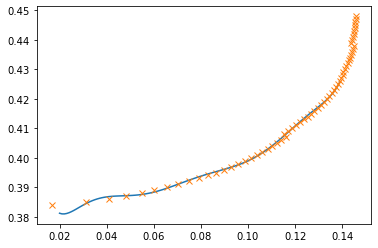

In [39]:
plt.plot(np.arange(0.02, 0.14, 0.001), poly(np.arange(0.02, 0.14, 0.001)))
plt.plot(gamma_interest, a_interest, 'x')

In [50]:
a = np.array([10,2,6])
b = [1,2,10,9,6]
b.sort()
a.sort()

In [51]:
a

array([ 2,  6, 10])

In [49]:
b

[1, 2, 6, 9, 10]